In [2]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import matplotlib.pyplot as plt

In [3]:
# generating dataset
def generate_dataset():
 x_batch = np.linspace(0, 2, 100)
 y_batch = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5
 return x_batch, y_batch

In [4]:
# Defining linear regression
def linear_regression():
  x = tf.placeholder(tf.float32, shape=(None, ), name='x')
  y = tf.placeholder(tf.float32, shape=(None, ), name='y')

  with tf.variable_scope('lreg') as scope:
    w = tf.Variable(np.random.normal(), name='W')
    b = tf.Variable(np.random.normal(), name='b')
		
    y_pred = tf.add(tf.multiply(w, x), b)

    loss = tf.reduce_mean(tf.square(y_pred - y))

  return x, y, y_pred, loss

In [11]:
def perform():
  x_batch, y_batch = generate_dataset()
  x, y, y_pred, loss = linear_regression()

  optimizer = tf.train.GradientDescentOptimizer(0.1)
  train_op = optimizer.minimize(loss)

  with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    feed_dict = {x: x_batch, y: y_batch}
		
    for i in range(35):
      session.run(train_op, feed_dict)
      print(i, "\tloss:", loss.eval(feed_dict))

    print('\nPrediction :\n')
    y_pred_batch = session.run(y_pred, {x : x_batch})

  plt.scatter(x_batch, y_batch)
  plt.plot(x_batch, y_pred_batch, color='red')
  plt.xlim(0, 2)
  plt.ylim(0, 2)
  plt.savefig('plot.png')

0 	loss: 0.73828214
1 	loss: 0.2621829
2 	loss: 0.11099471
3 	loss: 0.06285115
4 	loss: 0.047396094
5 	loss: 0.042318355
6 	loss: 0.040542178
7 	loss: 0.039823137
8 	loss: 0.039448865
9 	loss: 0.039192885
10 	loss: 0.038982835
11 	loss: 0.03879525
12 	loss: 0.03862221
13 	loss: 0.038460743
14 	loss: 0.03830947
15 	loss: 0.03816758
16 	loss: 0.0380344
17 	loss: 0.03790942
18 	loss: 0.03779209
19 	loss: 0.03768195
20 	loss: 0.03757857
21 	loss: 0.03748152
22 	loss: 0.037390426
23 	loss: 0.03730492
24 	loss: 0.03722464
25 	loss: 0.037149295
26 	loss: 0.037078574
27 	loss: 0.037012175
28 	loss: 0.03694985
29 	loss: 0.036891345
30 	loss: 0.036836434
31 	loss: 0.036784887
32 	loss: 0.036736492
33 	loss: 0.036691066
34 	loss: 0.03664843

Prediction :



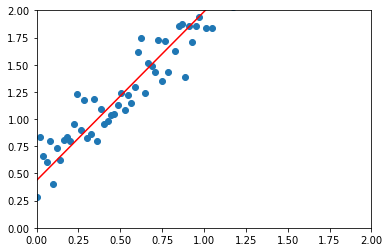

In [12]:
perform()